__реализация полиномиальной регрессии с помощью Numpy__

Евгений Борисов esborisov@sevsu.ru

In [1]:
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [2]:
import numpy as np
from numpy import random as rng
import math

from matplotlib import pyplot as plt 

In [4]:
# генерируем данные
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

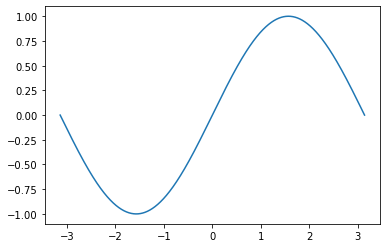

In [6]:
plt.plot(x,y)

In [5]:
# начальные значения коэффициентов регрессии
a,b,c,d = rng.randn(4)
a,b,c,d 

(0.24472479256779273, -2.8423071067178, 0.4870260855146423, 0.9896039492972918)

$ y = a + b x + c x^2 + d x^3 $

In [7]:
%%time

# цикл обучения

learning_rate = 1e-6 # скорость обучения

err_hist = [] # история изменения ошибки

for t in range(2000):
    # вычисляем выход модели
    y_pred =  a + b*x + c*(x**2) + d*(x**3)

    # считаем потерю
    loss = np.square(y_pred - y).sum()
    err_hist.append(loss)       

    # вычисляем значение градиента функции потери 
    grad_y_pred = 2. * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x**2).sum()
    grad_d = (grad_y_pred * x**3).sum()

    # изменяем параметры
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

CPU times: user 206 ms, sys: 0 ns, total: 206 ms
Wall time: 207 ms


In [8]:
print(f'y = %.4f + %.4f x + %.4f x^2 + %.4f x^3'%(a,b,c,d))

y = 0.0049 + 0.7964 x + -0.0008 x^2 + -0.0847 x^3


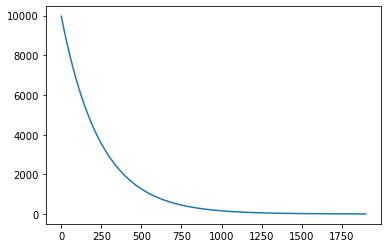

In [9]:
plt.plot(err_hist[100:])

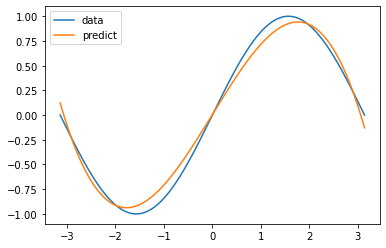

In [10]:
# проверяем результат

y_pred = a + b*x + c*(x**2) + d*(x**3)

plt.plot(x,y,label='data')
plt.plot(x,y_pred,label='predict')
plt.legend()